# Introduction 

Working with **tidy data** makes our lives as data scientists way easier.

We consider a dataset is of **high dimensionality** if it has more than 10 features.

Before opting to reduce dimensionality of our dataset we have to understand it

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')
sns.set()


In [ ]:
pokemon_df = pd.read_csv('../data/pokemon.csv')

In [ ]:
pokemon_df.head()

We can start reducing dimensionality by getting rid of those columns with no variance: having the same values for all the observations.

We can have a look to the variance of each feature with the *.describe()* pandas method. Keep in mind this method ignores non numerical columns by default. 

In [ ]:
len(pokemon_df.columns)

In [ ]:
pokemon_df.describe()

In [ ]:
pokemon_df.describe(exclude='number')

In [ ]:
pokemon_df.shape

Reducing dimensionality makes datasets: 
- be less complex
- require less disk space
- require less computation time
- have a lower chance of model overfitting

The simplest way to reduce dimensionality is to select only the features that are useful, but how to know who they are?

# Feature Selection VS Feature Extractions

## Feature selection

We can perform feature selection based on expertise (knowing that a certain feature wont be of any used based on SME experience), based on correlation with other features, the lack of variance of a certain feature.

## Feature extraction

It also reduces dimensionality, but it calculates or extract new features based on originals.

For datasets with numerous highly correlated features, dimensionality can be reduced using feature extraction.


In [ ]:
ansur_df = pd.read_csv('../data/ANSUR_II_MALE.csv')

ansur_df.head()

In [ ]:
ansur_df.shape

In [ ]:
list(ansur_df.columns)

In [ ]:
ansur_df_1 = ansur_df[['weight_kg', 'earlength', 'waistdepth', 'Gender']]

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

In [ ]:
ansur_df_1.shape

# t-SNE visualization of high-dimensional data

t-Distributed Stochastic Neighbor Embedding or t-SNE it's just a powerful technique to visualize high dimensional data using feature extraction.

t-SNE maximizes the distance in a two dimensional space between observations thata are most different in a high dimensional space.



In [ ]:
ansur_f_df = pd.read_csv('../data/ANSUR_II_FEMALE.csv')

ansur_f_df.head()

In [ ]:
ansur_f_df.shape

Lets remove the non numerical columns first since t-SNE doesnt work with that. 
We could do smth like one hot encoding eventually.

In [ ]:
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
df_numeric = ansur_f_df.drop(non_numeric, axis=1)
df_numeric.shape

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

In [ ]:
tsne_features = m.fit_transform(df_numeric)

tsne_features[1:4,:]

In [ ]:
ansur_f_df['x'] =tsne_features[:,0]
ansur_f_df['y'] =tsne_features[:,1]


In [ ]:
sns.scatterplot(data=ansur_f_df, x='x', y='y')
plt.show()

In [ ]:
sns.scatterplot(data=ansur_f_df, x='x', y='y', hue='BMI_class')
plt.show()

In [ ]:
sns.scatterplot(data=ansur_f_df, x='x', y='y', hue='Height_class')
plt.show()

# The Curse of Dimensionality

Models tend to overfit when there are too many features.

The number of observations should increase exponentially with the number of features to prevent overfitting.

## Features with missing values or little variance 



In [ ]:
ansur_m_df = pd.read_csv('../data/ANSUR_II_MALE.csv')
ansur_f_df = pd.read_csv('../data/ANSUR_II_FEMALE.csv')

ansur_df = pd.concat([ansur_m_df, ansur_f_df]) 
print(ansur_df.shape)

In [ ]:
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_df = ansur_df.drop(non_numeric, axis=1)
ansur_df.shape

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)

sel.fit(ansur_df)

mask = sel.get_support() 

print(mask)

In [ ]:
reduced_df = ansur_df.loc[:,mask]
print(reduced_df.shape)

There is a caveat when using the variance threshold selection technique: bigger values have bigger variances. To prevent problems linked to this normalize the values before performing the cleanup.



In [ ]:
sel = VarianceThreshold(threshold=0.005)

sel.fit(ansur_df/ansur_df.mean())

mask = sel.get_support() 

print(mask)

In [ ]:
reduced_df = ansur_df.loc[:,mask]
print(reduced_df.shape)

Another reason to drop a feature is the amount of missing values.

In [ ]:
pokemon_df.isna().sum().value_counts()

In [ ]:
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print (mask)

In [ ]:
reduced_pokemon_df = pokemon_df.loc[:,mask]
print(reduced_pokemon_df.shape)

When the number of missing values is low enough, instead of removing the feature we could apply **imputation** to filling in those missing values

# Pairwise correlation

Lets analize now how features relate to one another to decide if they are worth keeping

The correlation coefficient $r$ tells us if 2 variables are positive or negative correlated, no correlated at all and the intensity of the correlation. Values are from [-1, 1]


In [ ]:
ansur_m_df = pd.read_csv('../data/ANSUR_II_MALE.csv')
ansur_f_df = pd.read_csv('../data/ANSUR_II_FEMALE.csv')

ansur_df = pd.concat([ansur_m_df, ansur_f_df]) 
print(ansur_df.shape)

ansur_df_small = ansur_df[['weight_kg', 'earlength', 'waistdepth']]

In [ ]:
ansur_df_small.corr()

In [ ]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(ansur_df_small.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [ ]:
corr =ansur_df_small.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

mask

In [ ]:
sns.heatmap(ansur_df_small.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f", mask=mask)

## Removing Highly Correlated Features

Perfectly correlated features dont add information but complexity to the dataset.



In [ ]:
ansur_small = ansur_df[['suprasternaleheight', 'cervicaleheight', 'chestheight']]

corr = ansur_small.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f", mask=mask)

For these 3 features that are that highly correlated we can remove 2 and keep only one of them

In [ ]:
corr_df = ansur_small.corr().abs()

mask = np.triu(np.ones_like(corr_df, dtype=bool))

sns.heatmap(corr_df, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f", mask=mask)

In [ ]:
tri_df = corr_df.mask(mask)
tri_df

In [ ]:
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.95)]

In [ ]:
print (to_drop)

Correlation works well when there is a liner relationship between the 2 variables and the amount of outliers is not significant.

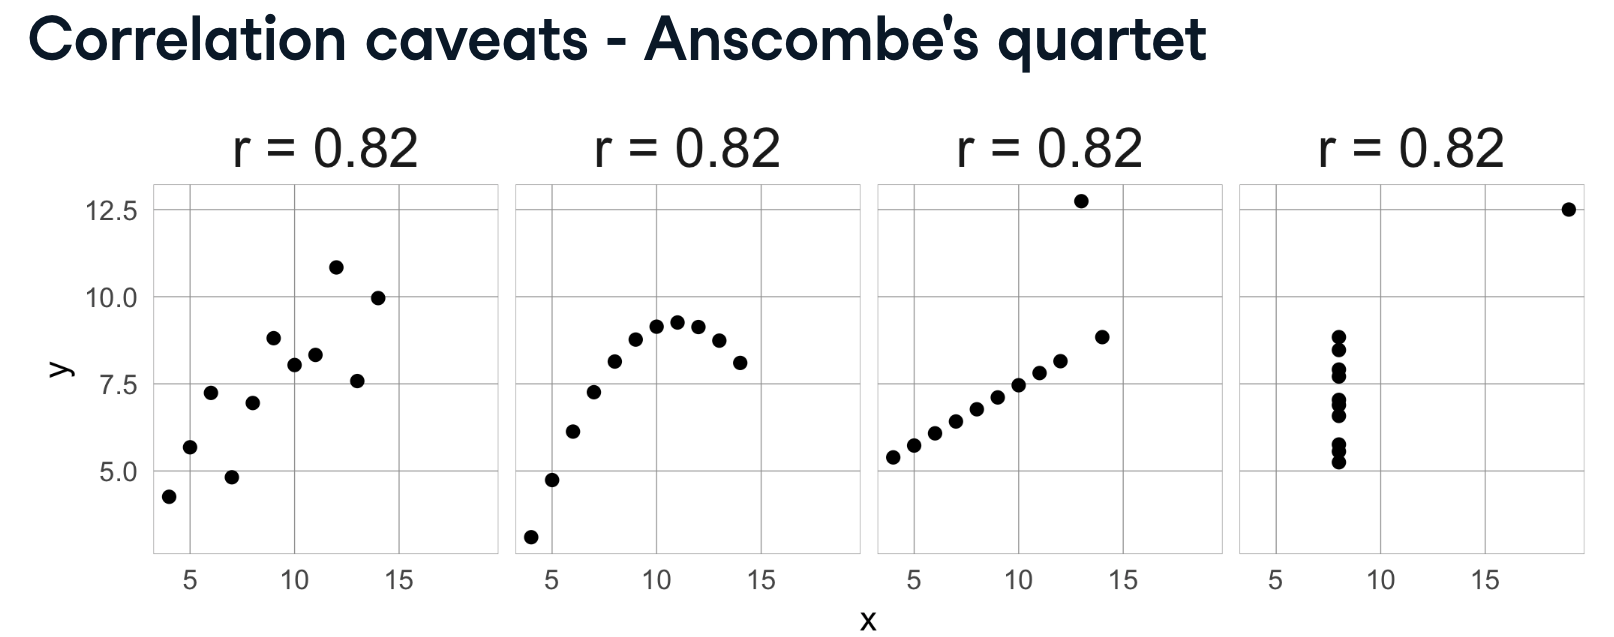

Make sure you visualy check the data before blindly trust the correlation coefficient.

# Selecting Features based on model performance

Another aspect to take into account when sekecting features is using how they contribute to the model performance.



In [ ]:
X = ansur_df[['chestdepth', 'handlength', 'neckcircumference', 'shoulderlength', 'earlength']]

y= ansur_df.Gender

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression() 

lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

print (accuracy_score(y_test, lr.predict(X_test_std)))


In [ ]:
print(lr.coef_)

In [ ]:
print(dict(zip(X.columns, abs(lr.coef_[0]))))

The coefficients close to 0 dont contribute much to the performance of the model.

In [ ]:
X.drop(['handlength'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression() 

lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

print (accuracy_score(y_test, lr.predict(X_test_std)))

The model performance remains pretty similar, the model complexity has been reduced and most likely its capacity of generalization has increased.

SciKit Learn has a tool for **Recursive Feature Elimination**. It trains the specified model using all the features available and keeps dropping them one by one and retraining till the *n_features_to_select* is achieved. This process is safer because instead of training once and dropping many features it trains the model several times so the coefficients are always up to date before dropping each feature.

In [ ]:
from sklearn.feature_selection import RFE

X = ansur_df[['chestdepth', 'handlength', 'neckcircumference', 'shoulderlength', 'earlength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

rfe.fit(X_train_std, y_train)

In [ ]:
print(rfe.support_)

In [ ]:
X.columns[rfe.support_]

In [ ]:
# Shows in which iteration each column has been dropped
print(dict(zip(X.columns, rfe.ranking_)))

In [ ]:
print(accuracy_score(y_test, rfe.predict(X_test_std)))

The drop in performance is quite low compared to the drop in complexity of the model.

# Tree-based feature selection

Some models perform feature selection by design like random forest.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

X = ansur_df.drop(non_numeric + ['Gender'], axis=1)
y = ansur_df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier() 
rf.fit(X_train, y_train)

print(accuracy_score(y_test, rf.predict(X_test)))

Training a randomForestClassifier on all the available features of ANSUR, the random forest seems to escape the Curse of Dimensionality and not overfit the training dataset.

Based on how often a feature is used to take decissions and if the decissions using that feature are at the beginning of the decision process or at the end, the RandomForestClassifier provides us with a feature importance list.

In [ ]:
import json

print(json.dumps(dict(zip(X.columns, np.round(rf.feature_importances_,2))), indent=True))



This feature importance values can be used to perform feature selection!!

In [ ]:
mask = rf.feature_importances_ > 0.070
X_small = X.loc[:, mask]
print(X_small.columns)

> **REMEMBER**: removing one feature can have an impact on the coefficients of other features

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1)
rfe.fit(X_train, y_train)

In [ ]:
# The step parameter makes the process faster
rfe = RFE(estimator=RandomForestClassifier(),step=10, n_features_to_select=6, verbose=1)
rfe.fit(X_train, y_train)

In [ ]:
print(X.columns[rfe.support_])

# Regularized Linear Regression

To avoid overfitting, in linear regression is often introduced a regularization term in the loss function, managed by a coefficient $\alpha$, that is the sum of the absolute values of the feature coefficients. Like this, during the fitting process, we will tray to minimize this term too, reducing like that the size of the feature coefficients.

Lasso is one variant of LinearRegression introducing this regularization term.

In [ ]:
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.005)

#la.fit(X_train, y_train)
print(la.coef_)

# The y we currently have is a categorical one :(

LassoCV eases the process to find the best alpha value.

# Combining feature selectors

We can use RFE with different estimators having the *.support_* parameter or *.coef_* != 0 after training to do a voting on which features to keep.

# Feature extraction

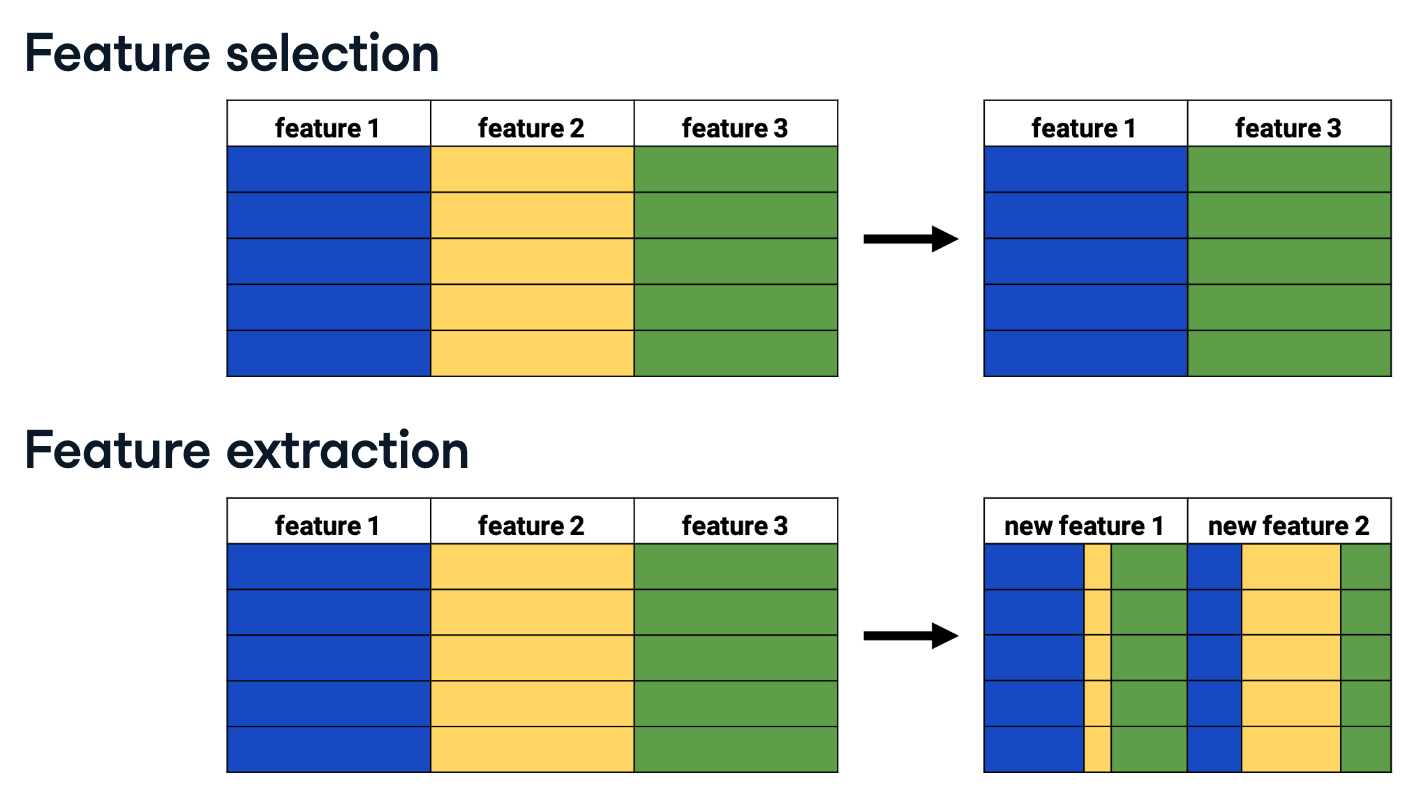

When you perfectly understand your dataset it could happen that you could come up with a feature that combines n features of your dataset making the original ones obsolete. An example is the BMI, calculated from weight and height. Averaging features is another example.

## Principal Component Analysis 



In [ ]:
sales_df = pd.read_csv('../data/sales.csv')
sales_df.head()

In [ ]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

For a dataset with n features we could calculate n principal components. They would be therefore ranked based on how much variance each component catches.

In [ ]:
from sklearn.decomposition import PCA

non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

df = ansur_df.drop(non_numeric + ['Gender'], axis=1)

scaler = StandardScaler()

std_df = scaler.fit_transform(df)

pca = PCA()
pca.fit(std_df)

print(pca.explained_variance_ratio_.round(2))

*.explained_variance_ratio_* list the variance explained by the principal components found.

In [ ]:
pca.explained_variance_ratio_.cumsum()

## PCA Applications

When using PCA you can choose the % of variance you want to leave behind.

There is one down side though, and its the fact that the principal components cannot be easily interpreted.

PCA doesnt work neither with categorical data.

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('reducer', PCA())
])

pc = pipe.fit_transform(df)

print(pc[:, :2])

In [ ]:
ansur_cats = ansur_df[non_numeric + ['Gender']]

ansur_cats['PC 1'] = pc[:,0]
ansur_cats['PC 2'] = pc[:,1]

In [ ]:
sns.scatterplot(data=ansur_cats, x='PC 1', y='PC 2', hue='Height_class', alpha=0.4)

In [ ]:
ansur_cats

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('reducer', PCA(n_components=3)), 
    ('classifier', RandomForestClassifier())
])
ansur_m_df = pd.read_csv('../data/ANSUR_II_MALE.csv')
ansur_f_df = pd.read_csv('../data/ANSUR_II_FEMALE.csv')

ansur_df = pd.concat([ansur_m_df, ansur_f_df]) 

non_numeric = ['BMI_class', 'Height_class', 'Component', 'Branch']

X_train, X_test, y_train, y_test = train_test_split(ansur_df.drop(non_numeric + ['Gender'], axis=1), ansur_df['Gender'], test_size=0.2)

pc = pipe.fit(X_train, y_train)


In [ ]:
print(pipe['reducer'].explained_variance_ratio_)

In [ ]:
print(np.round(pipe.score(X_test, y_test), 3))

## Principal Component Selection

If we pass a number between 0 and 1 to PCA with the n_components parameter, PCA will take Principal Components to explain that percentage of the variation.

This % of variation or number of principal components is still a number found based on gut feeling.

There is a way to find the optimal number of components: Elbow rule.

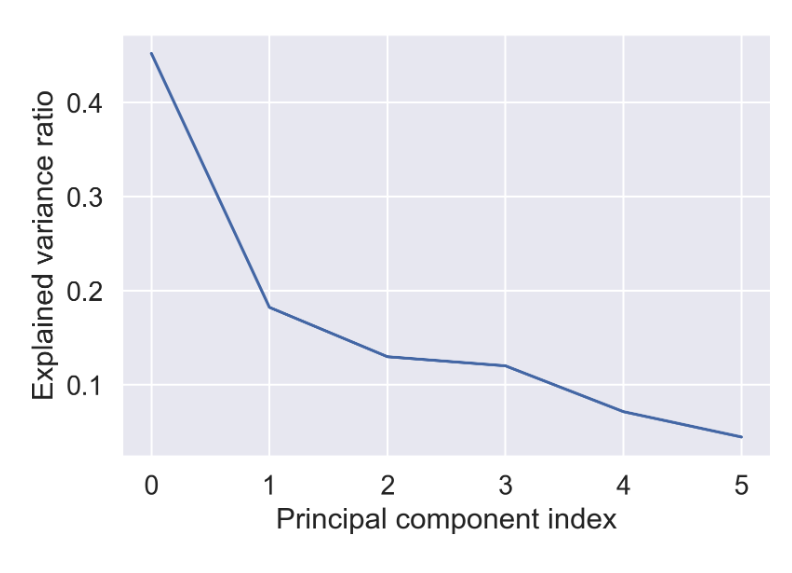

## Converting from pc to original dimensions

pca.inverse_transform(pc) can do so